<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Garage3" data-toc-modified-id="Garage3-1">Garage3</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-1.1">Standard ICP</a></span></li><li><span><a href="#With-Segmentation" data-toc-modified-id="With-Segmentation-1.2">With Segmentation</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-1.3">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-1" data-toc-modified-id="Rumlang-1-2">Rumlang 1</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-2.1">Standard ICP</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-2.2">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-2" data-toc-modified-id="Rumlang-2-3">Rumlang 2</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-3.1">Standard ICP</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-3.2">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-3" data-toc-modified-id="Rumlang-3-4">Rumlang 3</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-4.1">Standard ICP</a></span></li></ul></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.interpolate
import scipy.spatial.transform as stf
import re
import matplotlib.pyplot as plt
%matplotlib inline

# Garage 1
## Standard ICP

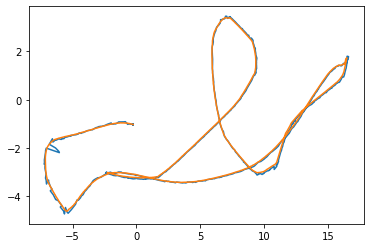

0.06636117609462638

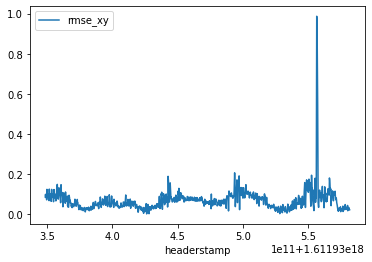

In [3]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage1_icp_4.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage1_leica_4.csv')
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(-leica['trans_y'], leica['trans_x'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, -leica['trans_y'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, leica['trans_x'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(-5.0, -2.0)

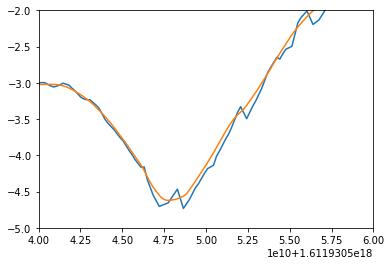

In [9]:
plt.plot(icp['headerstamp'], icp['trans_y'])
plt.plot(leica['headerstamp'] + 4.5e8, leica['trans_x'])
plt.xlim(1.61193e18 + 5.4e11, 1.61193e18 + 5.6e11)
plt.ylim(-5, -2)

## NYU Segmentation

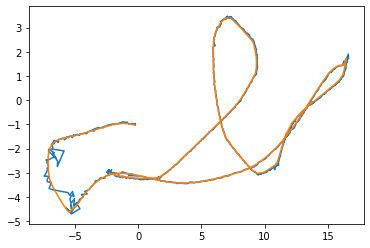

Mean: 0.077, Median: 0.055


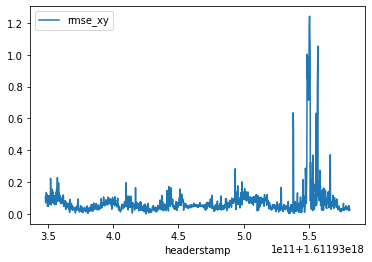

In [14]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage1_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage1_leica_3.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

## Our Segmentation

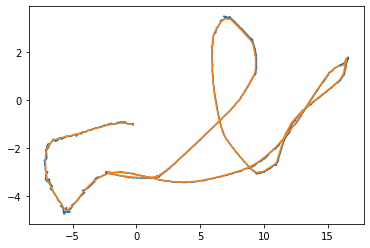

Mean: 0.059, Median: 0.054


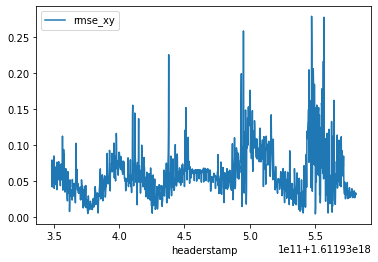

In [4]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Garage2
## Standard ICP

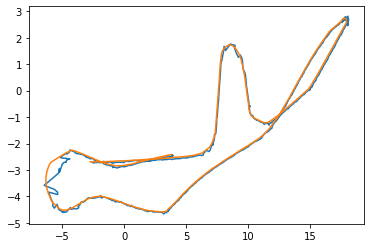

0.08690452011450207

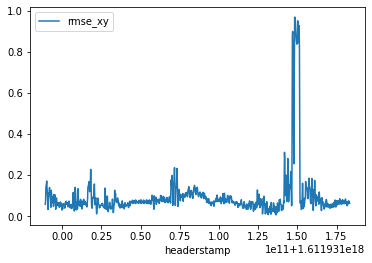

In [10]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage2_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage2_leica_1.csv')
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(-leica['trans_y'], leica['trans_x'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, -leica['trans_y'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, leica['trans_x'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

## NYU Segmentation

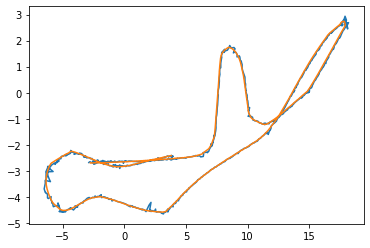

Mean: 0.077, Median: 0.064


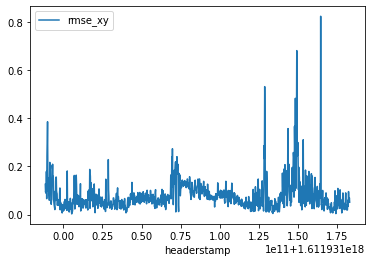

In [15]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage2_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage2_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

## Our Segmentation

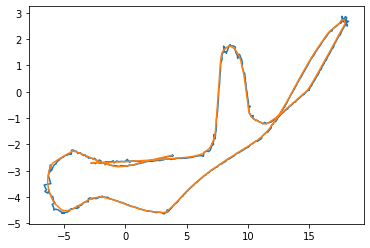

Mean: 0.064, Median: 0.057


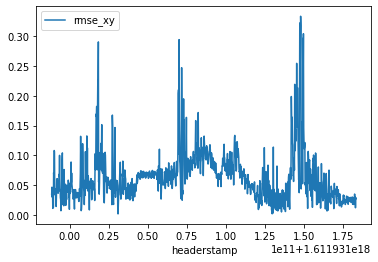

In [5]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage2_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage2_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Garage3
## Standard ICP

In [64]:
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage3_leica_27.csv')

In [65]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage3_icp_55.csv')

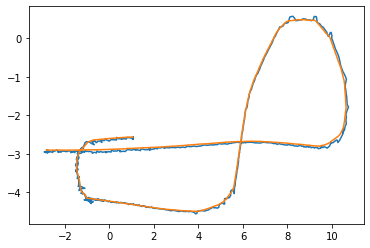

In [66]:
plt.figure()
plt.plot(icp1['trans_x'], icp1['trans_y'])
plt.plot(-leica['trans_y'], leica['trans_x'])

In [68]:
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'], -leica['trans_y'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'], leica['trans_x'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp['rmse_xy'].mean()

0.13252305474831794

(3, 6)

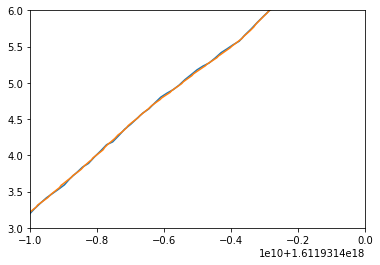

In [67]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp'] + 4.5e8, -leica['trans_y'])
plt.xlim(1.611931e18 + 3.9e11, 1.611931e18 + 4.0e11)
plt.ylim(3, 6)

## With Segmentation

In [35]:
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage3_leica_9.csv')
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage3_icp_9.csv')


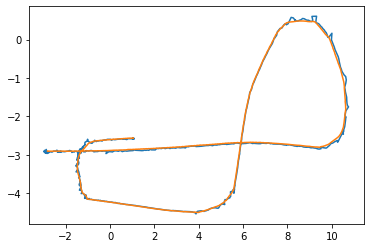

In [36]:
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(-leica['trans_y'], leica['trans_x'])

0.044083436563983114

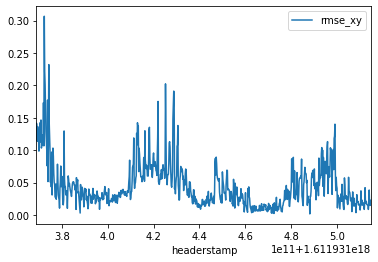

In [63]:
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, -leica['trans_y'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, leica['trans_x'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(3, 6)

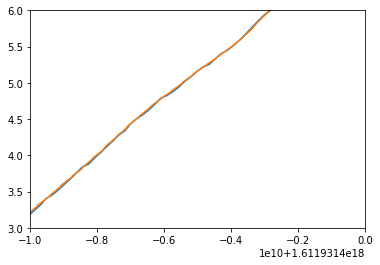

In [62]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp'] + 4.5e8, -leica['trans_y'])
plt.xlim(1.611931e18 + 3.9e11, 1.611931e18 + 4.0e11)
plt.ylim(3, 6)

### Replay Model

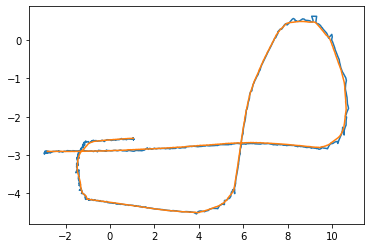

Mean: 0.043, Median: 0.035


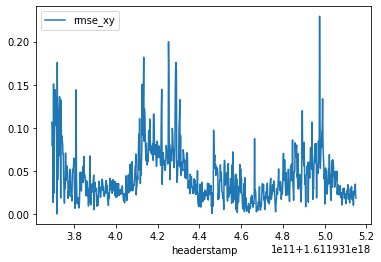

In [7]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage3_icp_14.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage3_leica_14.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

## Segmentation from NYU

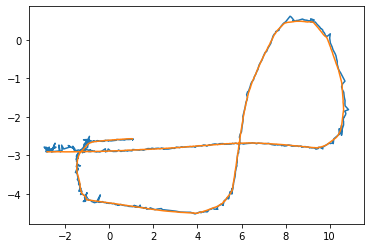

0.05542131578044619

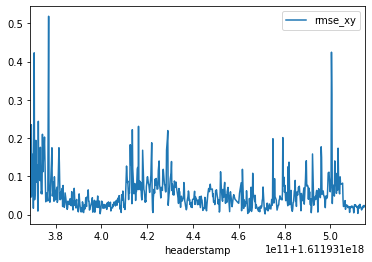

In [73]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage3_icp_6.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage3_leica_6.csv')
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(-leica['trans_y'], leica['trans_x'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, -leica['trans_y'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, leica['trans_x'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(3, 6)

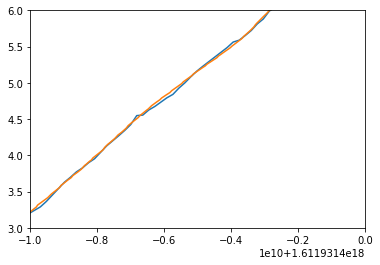

In [79]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp'] + 4.5e8, -leica['trans_y'])
plt.xlim(1.611931e18 + 3.9e11, 1.611931e18 + 4.0e11)
plt.ylim(3, 6)

Francescos Model

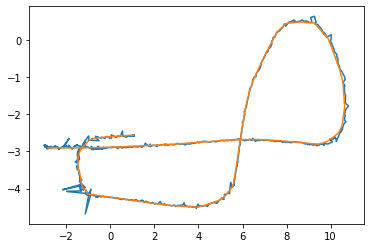

Mean: 0.058, Median: 0.041


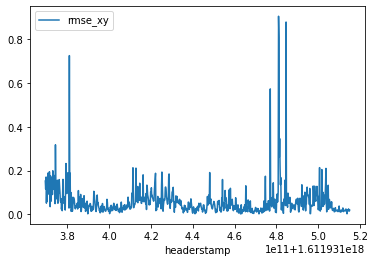

In [16]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage3_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage3_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Rumlang 1
## Standard ICP

a failed example:

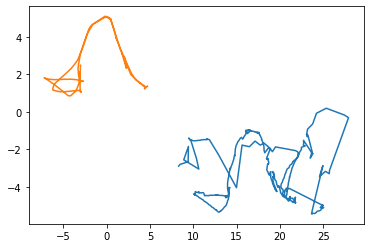

ValueError: A value in x_new is above the interpolation range.

In [80]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang1_icp_43.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang1_leica_43.csv')
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(-leica['trans_y'], leica['trans_x'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, -leica['trans_y'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, leica['trans_x'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(1.61278395e+18, 1.61278405e+18)

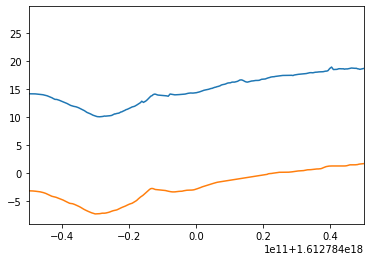

In [84]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp'] + 4.5e8, -leica['trans_y'])
plt.xlim(1.61278e18+39.5e11, 1.61278e18+40.5e11)

a better working example (rotated in the correct direction in the end)

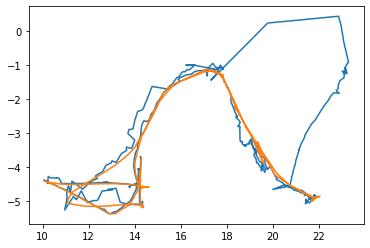

0.4552989621662345

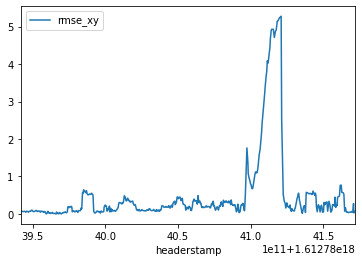

In [116]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang1_icp_44.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang1_leica_44.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(12, 14)

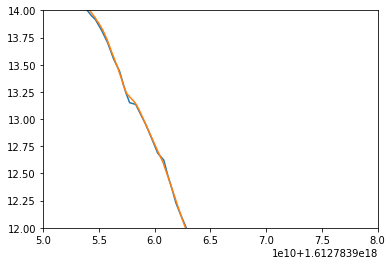

In [111]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp']  + 1.15e9, leica['aligned_x'])
plt.xlim(1.61278e18+39.5e11, 1.61278e18+39.8e11)
plt.ylim(12, 14)

## Segmentation from NYU

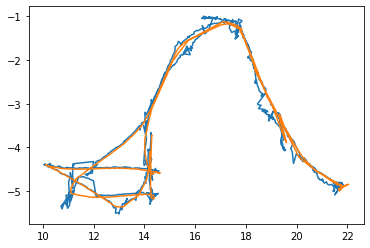

0.1324068418258569

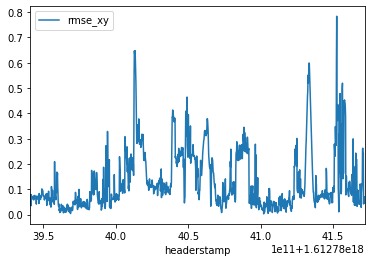

In [118]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_leica_3.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

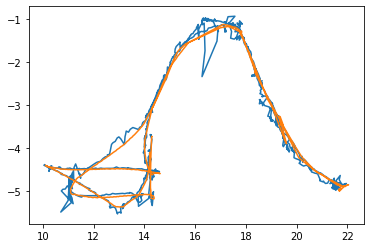

Mean: 0.147, Median: 0.091


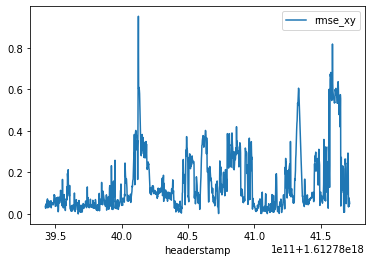

In [24]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Our Segmentation

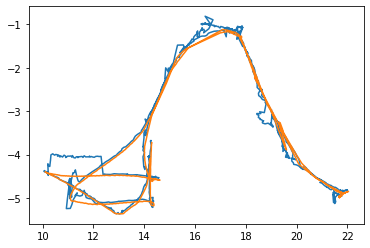

Mean: 0.128, Median: 0.075


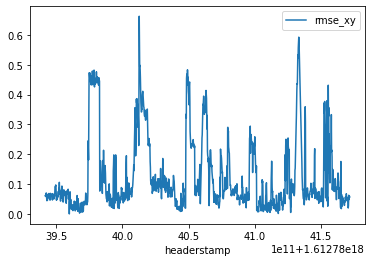

In [6]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_rumlang1_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_rumlang1_leica_3.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Rumlang 2
## Standard ICP

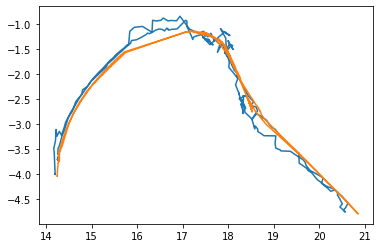

0.14412372344208826

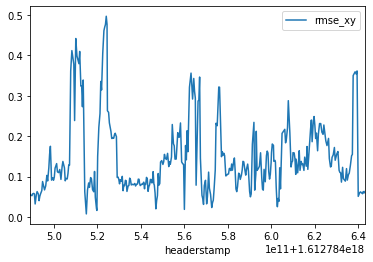

In [100]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang2_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang2_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_x'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_y'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(14.5, 16.5)

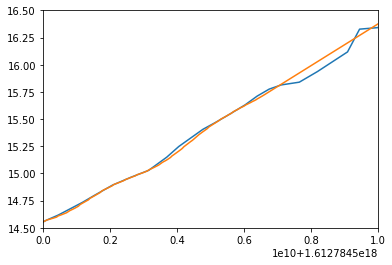

In [99]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp']  + 1.65e9, leica['aligned_x'])
plt.xlim(1.612784e18+5.0e11, 1.612784e18+5.1e11)
plt.ylim(14.5, 16.5)

## Segmentation from NYU

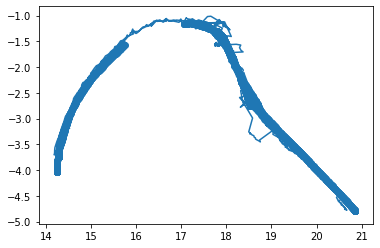

0.1284604427327006

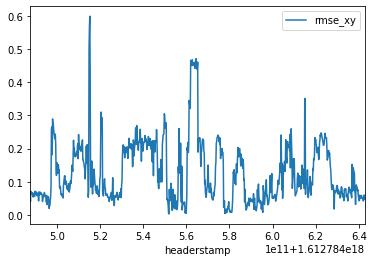

In [120]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(14.5, 16.5)

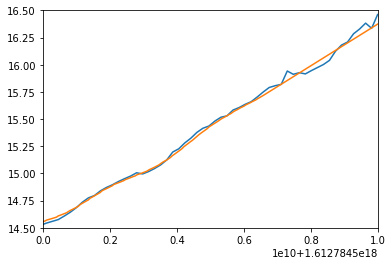

In [121]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp']  + 1.65e9, leica['aligned_x'])
plt.xlim(1.612784e18+5.0e11, 1.612784e18+5.1e11)
plt.ylim(14.5, 16.5)

with Francescos pretraine model:

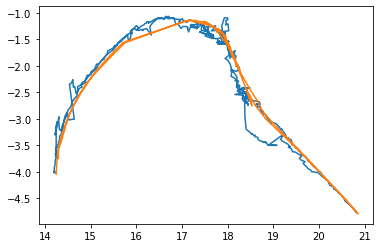

Mean: 0.135, Median: 0.119


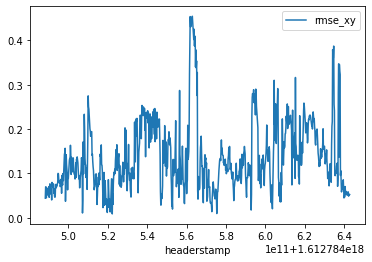

In [3]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Rumlang 3
## Standard ICP

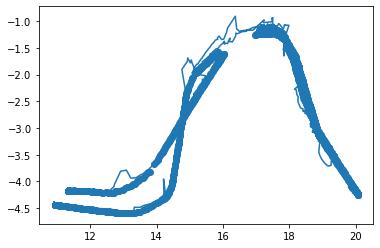

Mean: 0.134, Median: 0.108


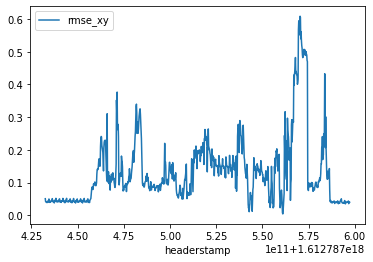

In [23]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang3_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang3_leica_1.csv')
# remove single outlier measurement
leica = leica.drop(index=307)
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

## NYU Pretraining

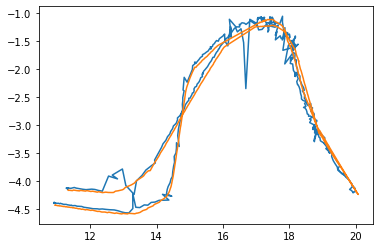

Mean: 0.118, Median: 0.100


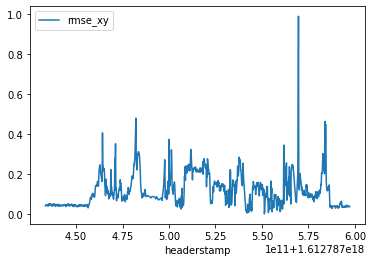

In [6]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang3_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang3_leica_1.csv')
# remove single outlier measurement
leica = leica.drop(index=307)
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

In [16]:
plt.plot(range(20), leica['trans_x'][306:320])

ValueError: x and y must have same first dimension, but have shapes (20,) and (14,)

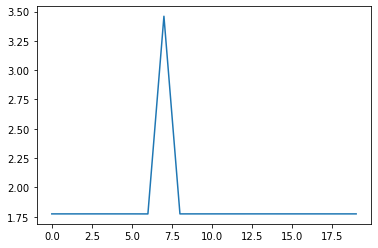

In [21]:
plt.plot(range(20), leica['trans_x'][300:320])

In [18]:
leica.iloc[306:309]

,headerstamp,receivestamp,trans_x,trans_y,trans_z,aligned_x,aligned_y
306,1612787448867316741,1.612787e+09,1.774105,6.367275,1.000918,10.941125,-4.435465
307,1612787449073316831,1.612787e+09,3.460043,4.332359,1.211590,12.976041,-2.749527
308,1612787449270316858,1.612787e+09,1.774328,6.367591,1.002182,10.940809,-4.435242


# Office4
## Standard ICP

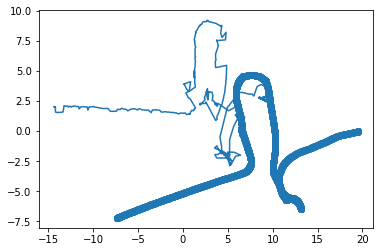

8.514315372837324

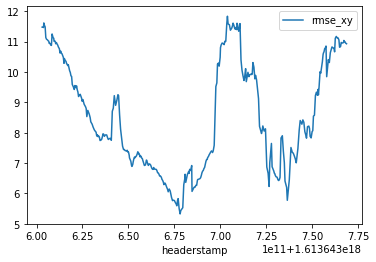

In [15]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_icp_5.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_leica_5.csv')
# alignment of reference frames
leica['aligned_x'] = leica['trans_x']
leica['aligned_y'] = leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

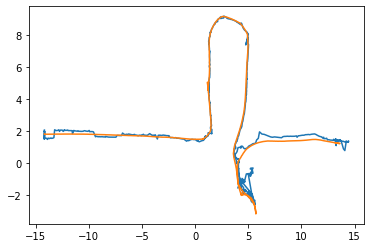

Mean: 0.255, Median: 0.163


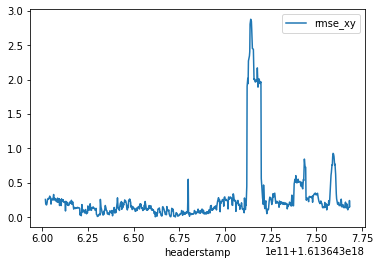

In [64]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_icp_8.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office4_leica_8.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

(6.0, 10.0)

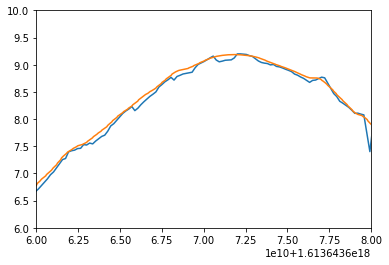

In [63]:
plt.plot(icp['headerstamp'], icp['trans_y'])
plt.plot(leica['headerstamp'] + 4e8, leica['aligned_y'])
plt.xlim(1.613643e18+6.6e11, 1.613643e18+6.8e11)
plt.ylim(6, 10)

## NYU Pretraining

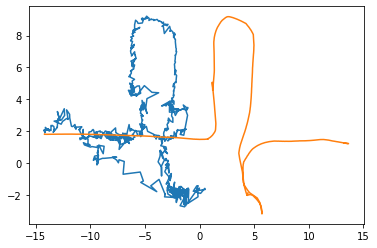

Mean: 7.769, Median: 7.112


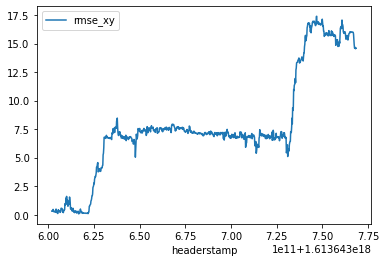

In [11]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office4_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office4_leica_3.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Office5
## Standard ICP

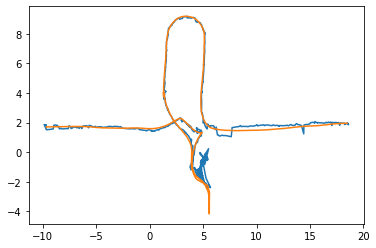

Mean: 0.396, Median: 0.149


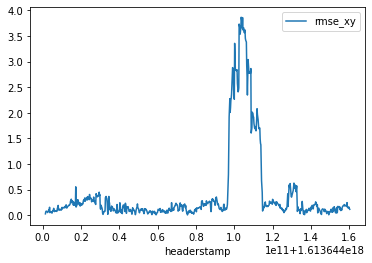

In [65]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_icp_4.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_leica_4.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

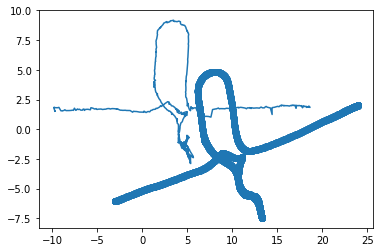

7.482331391154735

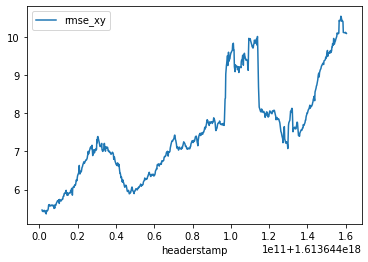

In [30]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_icp_5.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office5_leica_5.csv')
# alignment of reference frames
leica['aligned_x'] = leica['trans_x']
leica['aligned_y'] = leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

## NYU Pretraining

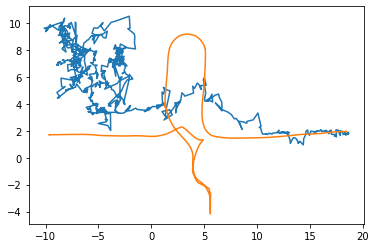

Mean: 8.194, Median: 9.568


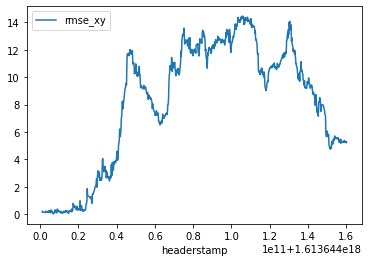

In [12]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office5_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office5_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

# Office6
## Standard ICP

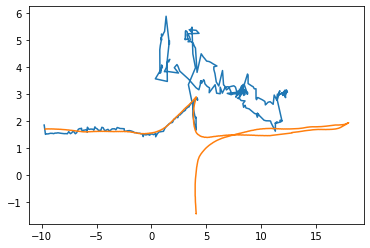

Mean: 3.103, Median: 4.109


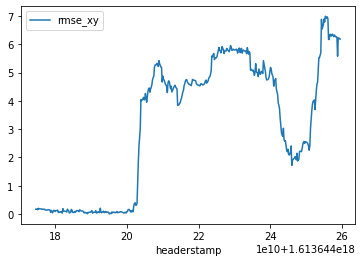

In [66]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office6_icp_6.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_office6_leica_6.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

## NYU Segmentation

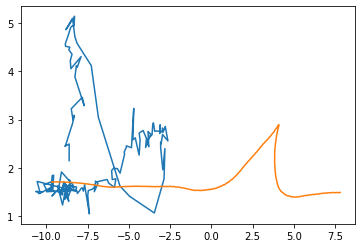

Mean: 6.983, Median: 7.118


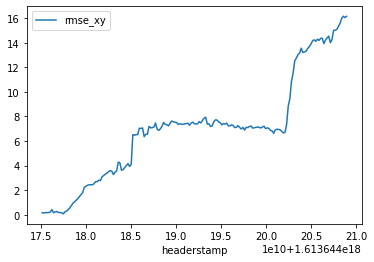

In [13]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office6_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_office6_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = np.cos(rot) * leica['trans_x'] + np.sin(rot) * leica['trans_y'] - 5.1
leica['aligned_y'] = -np.sin(rot) * leica['trans_x'] + np.cos(rot) * leica['trans_y'] + 6.7
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))